In [181]:
import pandas as pd
import numpy as np

df = pd.read_csv('yelp_business.csv')
hour = pd.read_csv('yelp_business_hours.csv')

In [182]:
df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [183]:
hour.head()

,business_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
1,He-G7vWjzVUysIKrfNbPUQ,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-16:0,8:0-16:0,None
2,KQPW8lFf1y5BT2MxiSZ3QA,None,None,None,None,None,None,None
3,8DShNS-LuFqpEWIp0HxijA,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-19:0
4,PfOCPjBrlQAnz__NXj9h_w,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-2:0,11:0-0:0


In [208]:
info = df.merge(hour,on = 'business_id', how = 'right').drop(['neighborhood'],axis=1)
# index of businesses that aren't open under 'is_open' column
closed_index = info.index[info['is_open']==0]

info = info.drop(closed_index,axis=0).reset_index(drop=True)

# initialize second set of indeces to keep track of businesses that are
# closed all 7 days of the week. Initialize with set of monday indeces
closed_index2 = set(info.index[info['monday']=='None'])

# shrink indeces until those that are closed all 7 days are left
for day in ['tuesday','wednesday','thursday','friday','saturday','sunday']:
    indeces = set(info.index[info['monday']=='None'])
    closed_index2 = closed_index2 & indeces

info = info.drop(closed_index2).reset_index(drop=True)
display(info.head())


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""","""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""","""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-16:0,8:0-16:0,None
2,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-2:0,11:0-0:0
3,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""","""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants,18:0-0:0,18:0-0:0,18:0-0:0,18:0-0:0,18:0-0:0,18:0-0:0,None
4,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""","""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,4.0,5,1,Real Estate Services;Real Estate;Home Services...,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,None,None


In [207]:
az = info[info['state'] == "AZ"]
az.head()
# We can also do this with ZIP codes or City to make a smaller subset

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""","""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
7,Y0eMNa5C-YU1RQOZf9XvVA,"""CubeSmart Self Storage""","""2414 South Gilbert Road""",Chandler,AZ,85286,33.271720,-111.791257,5.0,23,1,Local Services;Self Storage,9:30-18:0,9:30-18:0,9:30-18:0,9:30-18:0,9:30-18:0,8:30-17:30,11:0-15:0
10,IQSlT5jGE6CCDhSG0zG3xg,"""T & Y Nail Spa""","""8411 W Thunderbird Rd, Unit 101""",Peoria,AZ,85381,33.608654,-112.240012,3.0,20,1,Beauty & Spas;Nail Salons,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-18:0,10:0-17:0
12,0FMKDOU8TJT1x87OKYGDTg,"""Senior's Barber Shop""","""13375 W McDowell""",Goodyear,AZ,85395,33.463629,-112.347038,5.0,65,1,Barbers;Beauty & Spas,9:0-18:0,9:0-18:0,9:0-18:0,9:0-18:0,9:0-19:0,9:0-18:0,None
22,zzMu-6SmqhpvHxVRM6tx9g,"""Good Brakes Automotive""","""12614 N Cave Creek Rd, Ste 104""",Phoenix,AZ,85022,33.600877,-112.037685,4.0,5,1,Oil Change Stations;Smog Check Stations;Automo...,7:0-17:30,7:0-17:30,7:0-17:30,7:0-17:30,7:0-17:30,None,None


In [226]:
categories_str=';'.join(az['categories'].dropna())
categories_series = pd.DataFrame(categories_str.split(';'),columns=['category']).value_counts()
categories_df = categories_series.reset_index()
categories_df.columns = ['category','count']
display(categories_df)


,category,count
0,Home Services,6322
1,Shopping,5895
2,Restaurants,5608
3,Health & Medical,4802
4,Local Services,3666
...,...,...
1116,Dialysis Clinics,1
1117,Striptease Dancers,1
1118,Donation Center,1
1119,Drive-In Theater,1


Text(0.5, 0, 'Number of Businesses')

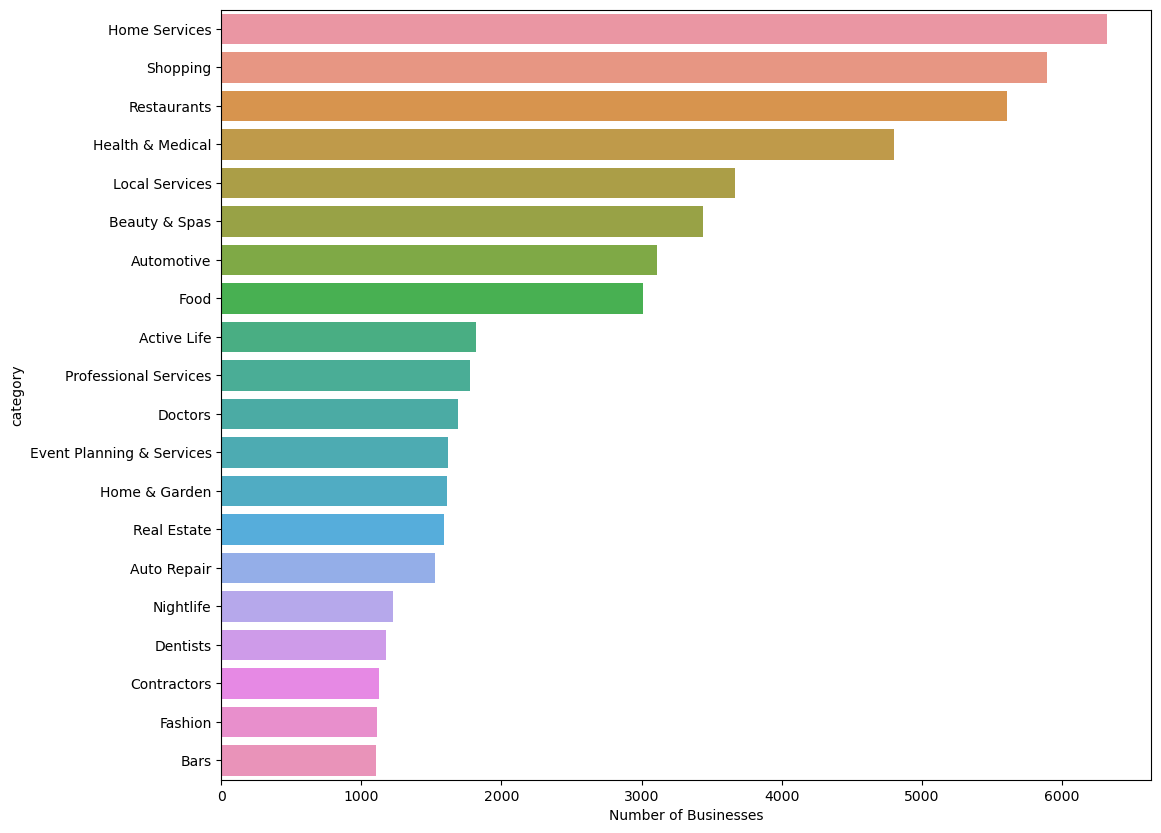

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
ax = sns.barplot(y = 'category', x = 'count', data = categories_df.iloc[0:20])
ax.set_xlabel('Number of Businesses')

In [231]:
category = 'Bars'
contain_values = az[az['categories'].str.contains(category)].reset_index()
display(contain_values)

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,232,pBoWsom3mZFYo9EucIWRDg,"""Kabuki Sushi & Grill""","""8378 W Thunderbird Rd, Ste 107""",Peoria,AZ,85381,33.611422,-112.239520,4.0,157,1,Restaurants;Japanese;Sushi Bars,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0
1,250,tCJGEQVqjELLYv3fPNX5Rw,"""Fleming's Prime Steakhouse-Scottsdale""","""20753 N Pima Rd""",Scottsdale,AZ,85255,33.674238,-111.889288,3.5,190,1,Nightlife;Restaurants;Steakhouses;Wine Bars;Ba...,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:30,17:0-22:30,16:0-21:0
2,351,LPq-IOpA_VrZ2xRh1A6Ssw,"""The Saguaro Restaurant""","""4000 North Drinkwater Blvd""",Scottsdale,AZ,85251,33.494121,-111.922762,3.5,10,1,Event Planning & Services;Sandwiches;Restauran...,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0
3,494,S8FDnhP4WKlRhJxSIkcxFg,"""Modern Round""","""8320 W Mariners Way""",Peoria,AZ,85382,33.629059,-112.238113,3.5,130,1,Arts & Entertainment;Virtual Reality Centers;B...,11:0-0:0,11:0-0:0,11:0-0:0,11:0-0:0,11:0-2:0,11:0-2:0,11:0-0:0
4,506,frCxZS7lPhEnQRJ3UY6m7A,"""La Santisima""","""1919 N 16th St""",Phoenix,AZ,85006,33.469201,-112.047393,4.0,1694,1,Vegetarian;Nightlife;Mexican;Bars;Vegan;Restau...,8:0-21:0,8:0-21:0,8:0-21:0,8:0-21:0,8:0-23:0,8:0-23:0,8:0-21:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,103975,nkHaix6KenApS8M-liZsCQ,"""Christopher's and Crush Lounge""","""2502 E Camelback Rd, Ste 102""",Phoenix,AZ,85016,33.511417,-112.028550,4.0,295,1,Nightlife;Bars;Restaurants;French;American (Ne...,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,12:0-21:0
1566,103988,6yUKYC9z0o6NEgylo8_RPg,"""Sodalicious""","""2333 S Val Vista Dr""",Gilbert,AZ,85295,33.307783,-111.755202,3.5,40,1,Specialty Food;Juice Bars & Smoothies;Food,7:30-22:0,7:30-22:0,7:30-22:0,7:30-22:0,7:30-23:0,8:30-23:0,None
1567,103999,0kD9yJIB2cmvOh8-WbcO_w,"""Poki Bar Central""","""2836 E Indian School Rd, Ste A-1""",Phoenix,AZ,85016,33.495436,-112.019786,3.5,66,1,Japanese;Poke;Restaurants;Hawaiian;Food;Sushi ...,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-20:30
1568,104020,ecJri9ozyke4dOCWulZiRQ,"""Nishikawa Ramen""","""1909 E Ray Rd""",Chandler,AZ,85225,33.320006,-111.809662,4.0,279,1,Japanese;Tapas Bars;Asian Fusion;Ramen;Restaur...,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0


## Next Step Forward
**We now have necessary information about the event categories based on location, so we can now construct functions for our webapp to return necessary dataframes with input given from the user!**

In [274]:
def load_df():
    # returns dataframe for all businesses available in the US
    df = pd.read_csv('yelp_business.csv')
    hour = pd.read_csv('yelp_business_hours.csv')
    info = df.merge(hour,on = 'business_id', how = 'right').drop(['neighborhood'],axis=1)
    closed_index = info.index[info['is_open']==0]
    info = info.drop(closed_index,axis=0).reset_index(drop=True)
    closed_index2 = set(info.index[info['monday']=='None'])
    for day in ['tuesday','wednesday','thursday','friday','saturday','sunday']:
        indeces = set(info.index[info['monday']=='None'])
        closed_index2 = closed_index2 & indeces
    return info.drop(closed_index2).reset_index(drop=True)

def user_df(df, state=None, city=None, zip_code=None, day=None, category=None):
    '''
    inputs: 
        df, 
        state: two-letter acronym string,
        city: string,
        zip_code: integer,
        day: string
        category: string
    returns:
        dataframe filtered by desired user input
    '''
    if state:
        df = df[df['state']==state]
    if city:
        df = df[df['city']==city]
    if zip_code:
        df = df[df['postal_code']==zip_code]
    if day:
        df = df[df[day]!='None']
    if category:
        df = df[df['categories'].str.contains(category)]
    return df.reset_index(drop=True)

def get_categories(df):
    '''
    input:
        filtered df with desired businesses
    returns:
        category df with their counts in descending order
    '''
    categories_str=';'.join(df['categories'].dropna())
    categories_series = pd.DataFrame(categories_str.split(';'),columns=['category']).value_counts()
    categories_df = categories_series.reset_index()
    categories_df.columns = ['category','count']
    return categories_df

Now, notice for each business, there are a number of reviews along with average rating. How can we make a proper recommendation to the user? A place with hundred reviews with an average rating of 5 should appear before another place with 1 review of 5 stars. We can implement this with weights to each metric.

In [275]:
def recommended_df(df):
    '''
    input:
        filtered df with desired businesses
    returns:
        sorted df based on 
            rating = weight_stars * stars + log(review_count)
    '''
    df_temp = df.copy()
    weight_stars = 0.7
    rating_col = weight_stars*df['stars']+np.log(df['review_count']+1)
    df_temp.insert(loc=0 ,column='rating', value=rating_col)
    df_temp = df_temp.sort_values(by=['rating'], ascending = False).reset_index(drop = True)
    return df_temp

In [279]:
businesses = load_df()
businesses = user_df(businesses, state='AZ', day = 'sunday', category='Buffet')
recommendation = recommended_df(businesses)
display(recommendation)

,rating,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,9.586150,tV5PcOIFlB12dpcbCy78VA,"""India Oven""","""1315 S Gilbert Rd""",Mesa,AZ,85204,33.391609,-111.787729,4.5,623,1,Indian;Buffets;Restaurants,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0
1,9.234499,JQYkVnUzS5vgFxZgCuW7ag,"""Thai E-San""","""616 W Indian School Rd""",Phoenix,AZ,85013,33.495155,-112.082213,4.5,438,1,Buffets;Thai;Restaurants;Beer;Wine & Spirits;Food,11:0-21:30,11:0-21:30,11:0-21:30,11:0-21:30,11:0-21:30,12:0-21:30,12:0-21:30
2,9.022118,S4qUsi44l5D9BbUCkhwQEA,"""New India Gate""","""4939 W Ray Rd, Ste 1""",Chandler,AZ,85226,33.319230,-111.925813,4.5,354,1,Buffets;Bars;Nightlife;Vegan;Beer Bar;Indian;H...,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-21:0
3,8.939960,tnG4_L5bZiffTbaFru9EBg,"""Princess Mediterranean Market & Deli""","""2620 W Broadway Rd""",Mesa,AZ,85202,33.407997,-111.887898,4.5,326,1,Home Services;Buffets;Food;Restaurants;Lebanes...,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,10:0-20:0,10:0-19:0
4,8.879933,-8QlV3b_9H4BAh6LgMIr1g,"""Nandini Indian Cuisine""","""1845 E Broadway Rd, Ste 101""",Tempe,AZ,85282,33.406601,-111.907520,4.0,436,1,Indian;Buffets;Vegan;Restaurants,17:0-21:30,17:0-21:30,17:0-21:30,17:0-21:30,17:0-21:30,11:0-14:30,11:0-14:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,4.179442,prrnJEMpCh1cSxrQJBYy7g,"""Hibachi City Buffet""","""3414 W Southern Ave, Ste 168""",Phoenix,AZ,85041,33.392205,-112.131667,3.0,7,1,Sushi Bars;Buffets;Restaurants;Chinese,11:0-21:30,11:0-21:30,11:0-21:30,11:0-21:30,11:0-22:30,11:0-22:30,11:0-21:30
102,3.994439,4qpHOC34mwzE5aJnGm1_BA,"""Peter Piper Pizza""","""1463 N Dysart Rd""",Avondale,AZ,85323,33.453203,-112.340317,1.5,18,1,Restaurants;Pizza;Chicken Wings;Buffets,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-23:0,10:0-23:0,11:0-22:0
103,3.597225,tSJaZL5X81j2k-GqtpBM_w,"""Peter Piper Pizza""","""4105 N 51st Ave, Ste 111""",Phoenix,AZ,85031,33.495977,-112.167255,2.0,8,1,Chicken Wings;Buffets;Pizza;Restaurants,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-23:0,10:0-23:0,11:0-22:0
104,3.136294,89Tgq6_T1m8CQ-8l_VPcDQ,"""Pitchforks Restaurant""","""301 E Orange Mall""",Tempe,AZ,85281,33.418315,-111.933799,2.5,3,1,Buffets;Restaurants,7:0-21:0,7:0-21:0,7:0-21:0,7:0-21:0,7:0-19:0,8:0-19:0,8:0-20:0


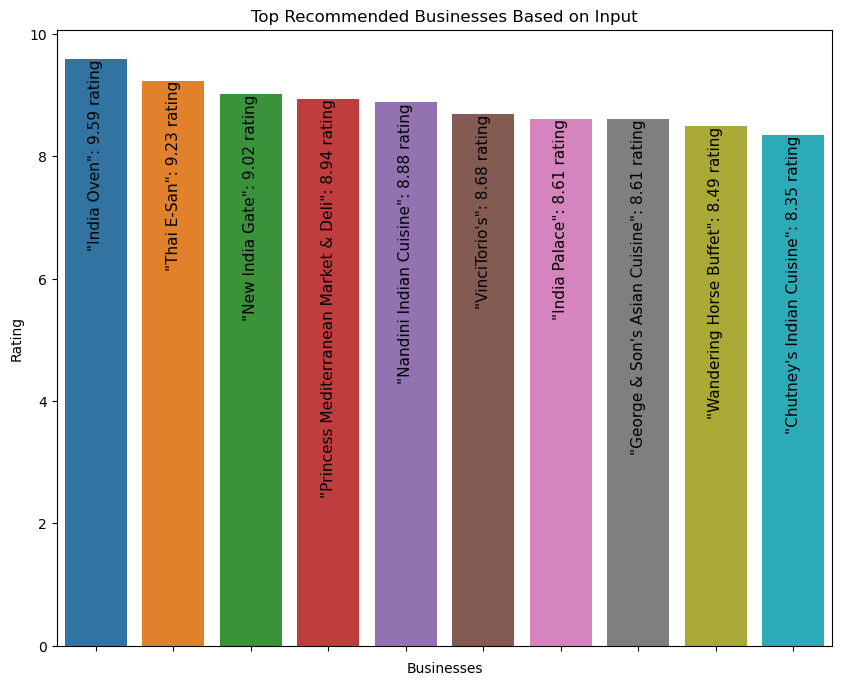

In [341]:
top_recommendations = recommendation.iloc[:10]

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=top_recommendations, x='name', y='rating')

for i, row in top_recommendations.iterrows():
    ax.text(i, row['rating'], row['name']+ ': ' + str(round(row['rating'],2)) + ' rating', 
            color='black', ha="center", va="top", 
            fontsize=11, rotation = 90)
ax.set_title('Top Recommended Businesses Based on Input')
ax.set_xlabel('Businesses')
ax.set_xticklabels([])
ax.set_ylabel('Rating')
plt.show()